In [100]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import umap
from yellowbrick.cluster import SilhouetteVisualizer 
from sklearn.manifold import TSNE
import seaborn as sns

In [101]:
#Se van a combinar dos vectores: el extraidos a partir de la transformada de Fourier y el extraidoa partir de la forma de los callos.
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"

#Primero se cargan las caraterísticas normalizadas por z-score y min-max de forma.
# Cargar las característicasde forma normalizadas por Z-score
df_shape_z = pd.read_csv(os.path.join(folder_path, "features_shape_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_shape_mm = pd.read_csv(os.path.join(folder_path, "features_shape_minmax.csv"))

#Después se cargan las caraterísticas de color normalizadas por z-score y min-max de fourier.
df_color_z = pd.read_csv(os.path.join(folder_path, "features_color_all_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_color_mm = pd.read_csv(os.path.join(folder_path, "features_color_all_minmax.csv"))

#Después se cargan las caraterísticas de textura normalizadas por z-score y min-max de fourier.
df_textura_z = pd.read_csv(os.path.join(folder_path, "features_glcm_all_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_textura_mm = pd.read_csv(os.path.join(folder_path, "features_glcm_all_minmax.csv"))

#Selección de columnas de shape
#Seleccionadas (z-score)
selected_shape_z = ['eccentricity', 'solidity', 'major_axis_length']
df_shape_z_selected = df_shape_z[selected_shape_z]

#Seleccionadas (min-max)
selected_shape_mm =['eccentricity', 'solidity', 'major_axis_length']
df_shape_mm_selected = df_shape_mm[selected_shape_mm]

#Selección de columnas de color
#Seleccionadas (z-score)
selected_color_z = ['hue', 'brightness', 'saturation']
df_color_z_selected = df_color_z[selected_color_z]

#Seleccionadas (min-max)
selected_color_mm =['hue', 'brightness', 'saturation']
df_color_mm_selected = df_color_mm[selected_color_mm]


#Selección de columnas de textura
#Seleccionadas (z-score)
selected_textura_z = ['contrast', 'homogeneity', 'correlation', 'label', 'filename']
df_textura_z_selected = df_textura_z[selected_textura_z]

#Seleccionadas (min-max)
selected_textura_mm = ['contrast', 'homogeneity', 'correlation', 'label','filename']
df_textura_mm_selected = df_textura_mm[selected_textura_mm]


#combinación z-score
df_combined_stc_z = pd.concat([df_shape_z_selected, df_color_z_selected, df_textura_z_selected], axis=1)

#combinación minmax
df_combined_stc_mm = pd.concat([df_shape_mm_selected,df_color_z_selected,df_textura_mm_selected ], axis=1)

# Guardar en archivos CSV
df_combined_stc_z.to_csv(os.path.join(folder_path, "features_combined_stc_zscore.csv"), index=False)
df_combined_stc_mm.to_csv(os.path.join(folder_path, "features_combined_stc_minmax.csv"), index=False)

In [102]:
df_combined_stc_z

,eccentricity,solidity,major_axis_length,hue,brightness,saturation,contrast,homogeneity,correlation,label,filename
0,1.258475,0.135962,-0.597306,0.173814,-0.258016,-0.908055,-0.117970,0.573895,0.261439,smaller,callo_1.png
1,1.265948,-1.705151,0.510064,3.173069,1.450514,-2.630162,-0.689035,1.111661,-0.049338,smaller,callo_10.png
2,0.280864,1.269197,-1.051417,-0.718451,-0.160670,0.927561,0.723027,-0.528180,-0.919636,smaller,callo_100.png
3,0.602786,0.913221,-0.690335,-0.373024,0.338521,0.458052,0.125226,-0.517080,-0.678186,smaller,callo_101.png
4,-0.817832,1.210664,-1.792010,-0.064264,-0.045647,0.141367,1.304987,-1.718236,-1.826587,smaller,callo_102.png
...,...,...,...,...,...,...,...,...,...,...,...
532,-0.758095,-0.607485,0.538420,0.893369,0.602273,-0.410392,-0.277401,0.875899,0.546989,higher,callo_95.png
533,-1.279988,0.055104,0.529269,0.014286,-0.105928,0.361934,0.083434,1.088512,0.255967,higher,callo_96.png
534,0.155389,-0.289068,0.734055,1.284708,0.114134,-0.041958,-0.097836,0.451454,0.459498,higher,callo_97.png
535,-0.407132,-1.467330,0.819826,2.768508,1.430725,-1.294443,-0.449770,1.655792,0.716253,higher,callo_98.png


In [103]:
df_combined_stc_mm

,eccentricity,solidity,major_axis_length,hue,brightness,saturation,contrast,homogeneity,correlation,label,filename
0,0.840083,0.749355,0.358292,0.173814,-0.258016,-0.908055,0.180035,0.849470,0.834112,smaller,callo_1.png
1,0.841452,0.441238,0.592452,3.173069,1.450514,-2.630162,0.108787,0.916683,0.789212,smaller,callo_10.png
2,0.660993,0.939005,0.262267,-0.718451,-0.160670,0.927561,0.284960,0.711725,0.663472,smaller,callo_100.png
3,0.719967,0.879431,0.338620,-0.373024,0.338521,0.458052,0.210377,0.713113,0.698357,smaller,callo_101.png
4,0.459722,0.929210,0.105664,-0.064264,-0.045647,0.141367,0.357567,0.562984,0.532437,smaller,callo_102.png
...,...,...,...,...,...,...,...,...,...,...,...
532,0.470665,0.624936,0.598448,0.893369,0.602273,-0.410392,0.160144,0.887216,0.875368,higher,callo_95.png
533,0.375058,0.735823,0.596513,0.014286,-0.105928,0.361934,0.205163,0.913790,0.833322,higher,callo_96.png
534,0.638007,0.678224,0.639816,1.284708,0.114134,-0.041958,0.182547,0.834166,0.862728,higher,callo_97.png
535,0.534958,0.481038,0.657953,2.768508,1.430725,-1.294443,0.138639,0.984693,0.899824,higher,callo_98.png


In [104]:
#se quitan las columnas 'filename' y 'label'
df_combined_stc_mm_cl= df_combined_stc_mm.drop(columns=['label', 'filename'])
df_combined_stc_z_cl= df_combined_stc_z.drop(columns=[ 'label', 'filename'])


A continuación, se va hacer clustering con el método K-means del vector combinado.
Primero con los datos normalizados con z-score.

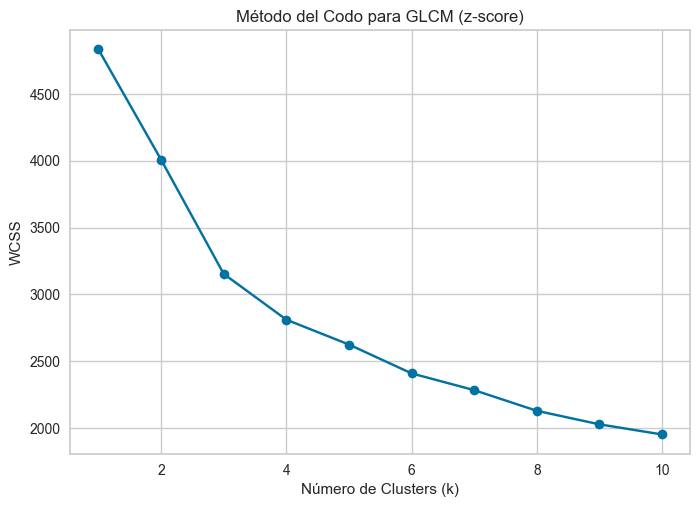

In [105]:
# Método del codo
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)
    kmeans.fit(df_combined_stc_z_cl)
    WCSS.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, 11), WCSS, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo para GLCM (z-score)')
plt.grid(True)
plt.show()

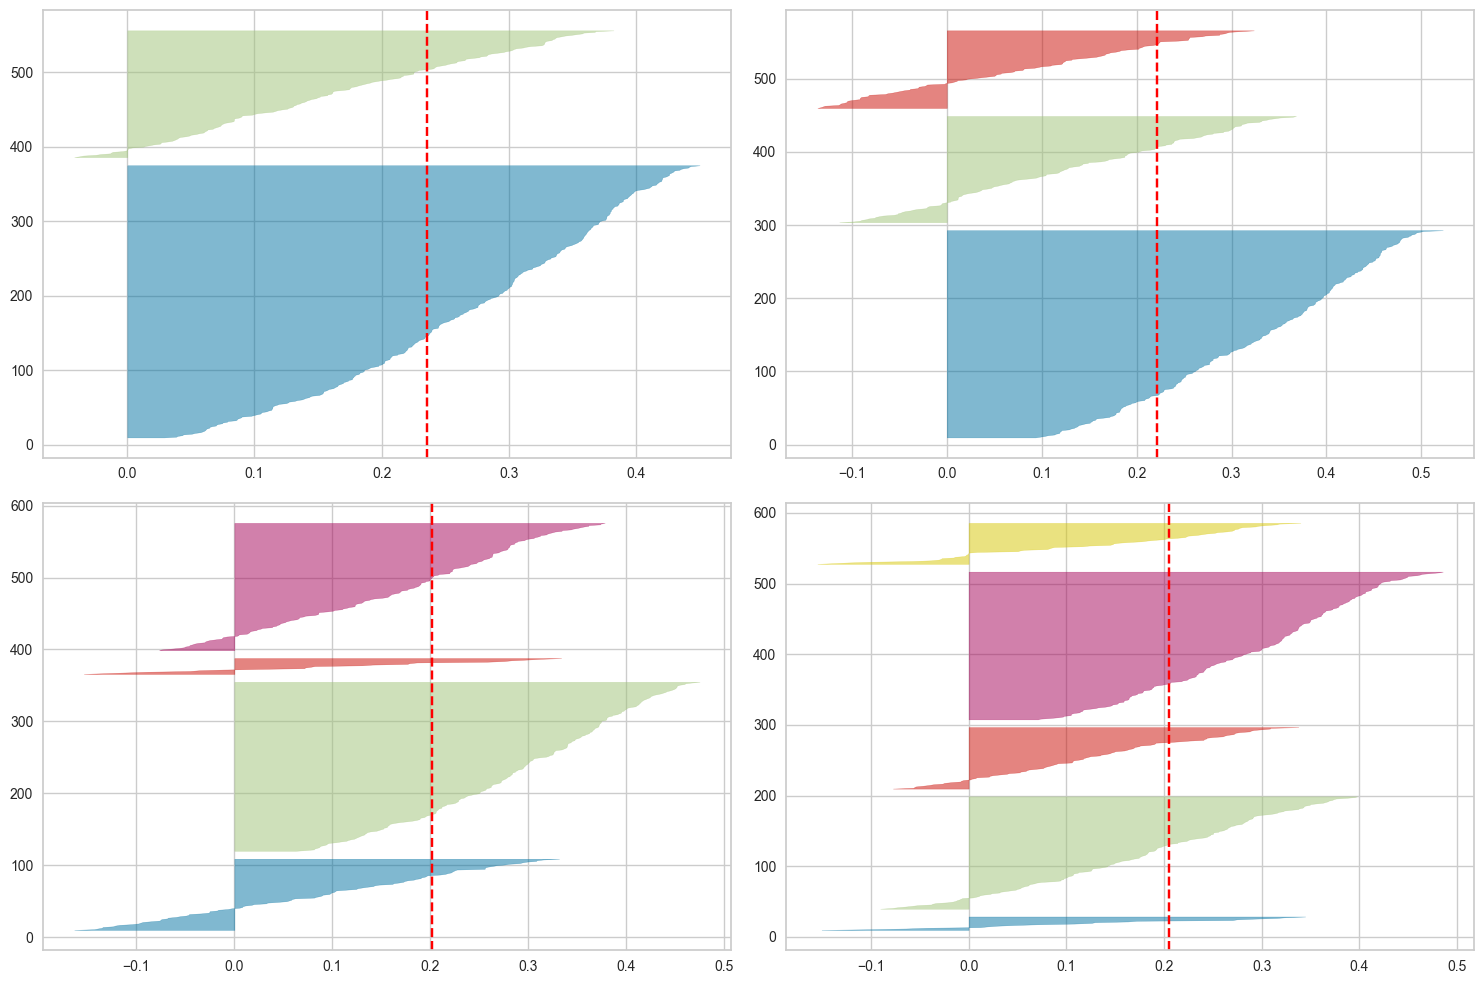

In [106]:
# Creamos la figura con 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probamos con k = 2, 3, 4, 5
for i, k in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    
    # Posición del subplot
    row = i // 2
    col = i % 2
    
    # Creamos el visualizador y ajustamos los datos
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(df_combined_stc_z_cl)  

plt.tight_layout()
plt.show()

In [107]:
#Modelo k-means
cluster_stc_z= KMeans(init='k-means++',n_clusters=3,random_state=42)
cluster_stc_z.fit(df_combined_stc_z_cl)   

KMeans(n_clusters=3, random_state=42)

In [108]:
#Se añaden las etiquetas y vemos en una tabla de contigencia cuantos smaller o higher hay en cada cluster
df_combined_stc_z['Cluster'] = cluster_stc_z.labels_
pd.crosstab(df_combined_stc_z['Cluster'], df_combined_stc_z['label'])

label,higher,smaller
Cluster,,
0,53,52
1,209,80
2,6,137


In [109]:
silhouette_avg_stc_z = silhouette_score(df_combined_stc_z_cl, cluster_stc_z.labels_)
print(f'Índice de silueta promedio: {silhouette_avg_stc_z}')

Índice de silueta promedio: 0.22347686199969144


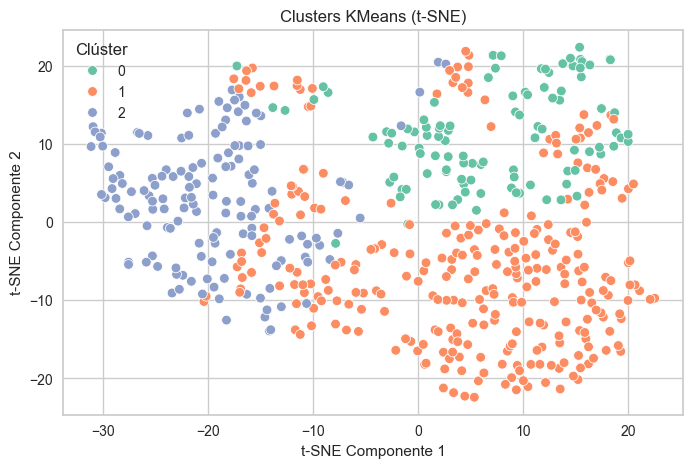

In [110]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_combined_stc_z_cl)

# Visualización
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df_combined_stc_z['Cluster'], palette='Set2')
plt.title('Clusters KMeans (t-SNE)')
plt.xlabel('t-SNE Componente 1')
plt.ylabel('t-SNE Componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


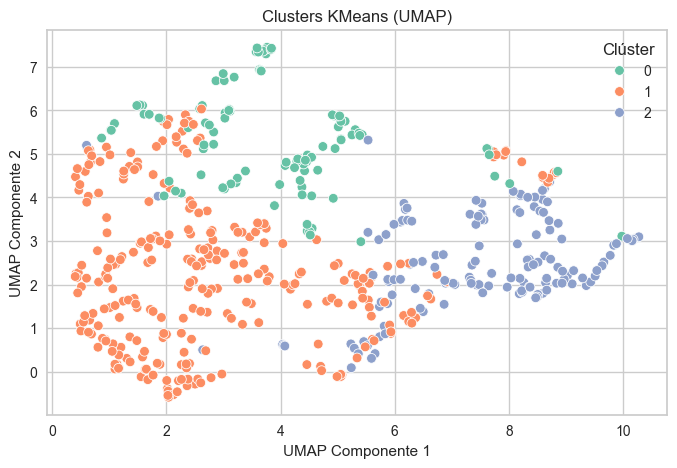

In [111]:
umap_model = umap.UMAP(n_neighbors=8,n_components=2, random_state=42)
X_umap = umap_model.fit_transform(df_combined_stc_z_cl)

# Visualización correcta con UMAP
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=df_combined_stc_z['Cluster'], palette='Set2')
plt.title('Clusters KMeans (UMAP)')
plt.xlabel('UMAP Componente 1')
plt.ylabel('UMAP Componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()


In [112]:
# Guardar resultados en DataFrame
df_resultado_z_umap = pd.DataFrame({
    'filename': df_combined_stc_z['filename'],
    'label': df_combined_stc_z['label'],
    'cluster': df_combined_stc_z['Cluster']
})

# Guardar en archivo CSV 
#df_resultado_z_umap.to_csv(os.path.join(folder_path, 'resultado_clustering_z_umap.csv'), index=False)
df_resultado_z_umap

,filename,label,cluster
0,callo_1.png,smaller,1
1,callo_10.png,smaller,0
2,callo_100.png,smaller,2
3,callo_101.png,smaller,2
4,callo_102.png,smaller,2
...,...,...,...
532,callo_95.png,higher,0
533,callo_96.png,higher,1
534,callo_97.png,higher,1
535,callo_98.png,higher,0


Ahora se realiza lo mismo pero con la normalización min-max

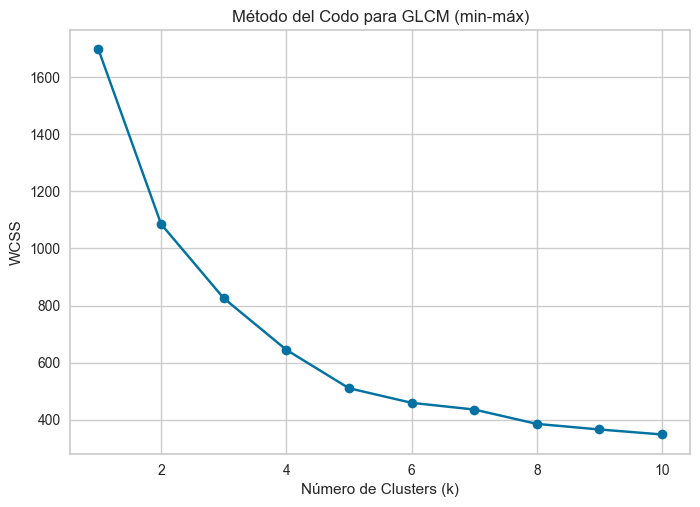

In [113]:
# Método del codo
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)
    kmeans.fit(df_combined_stc_mm_cl)
    WCSS.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, 11), WCSS, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo para GLCM (min-máx)')
plt.grid(True)
plt.show()

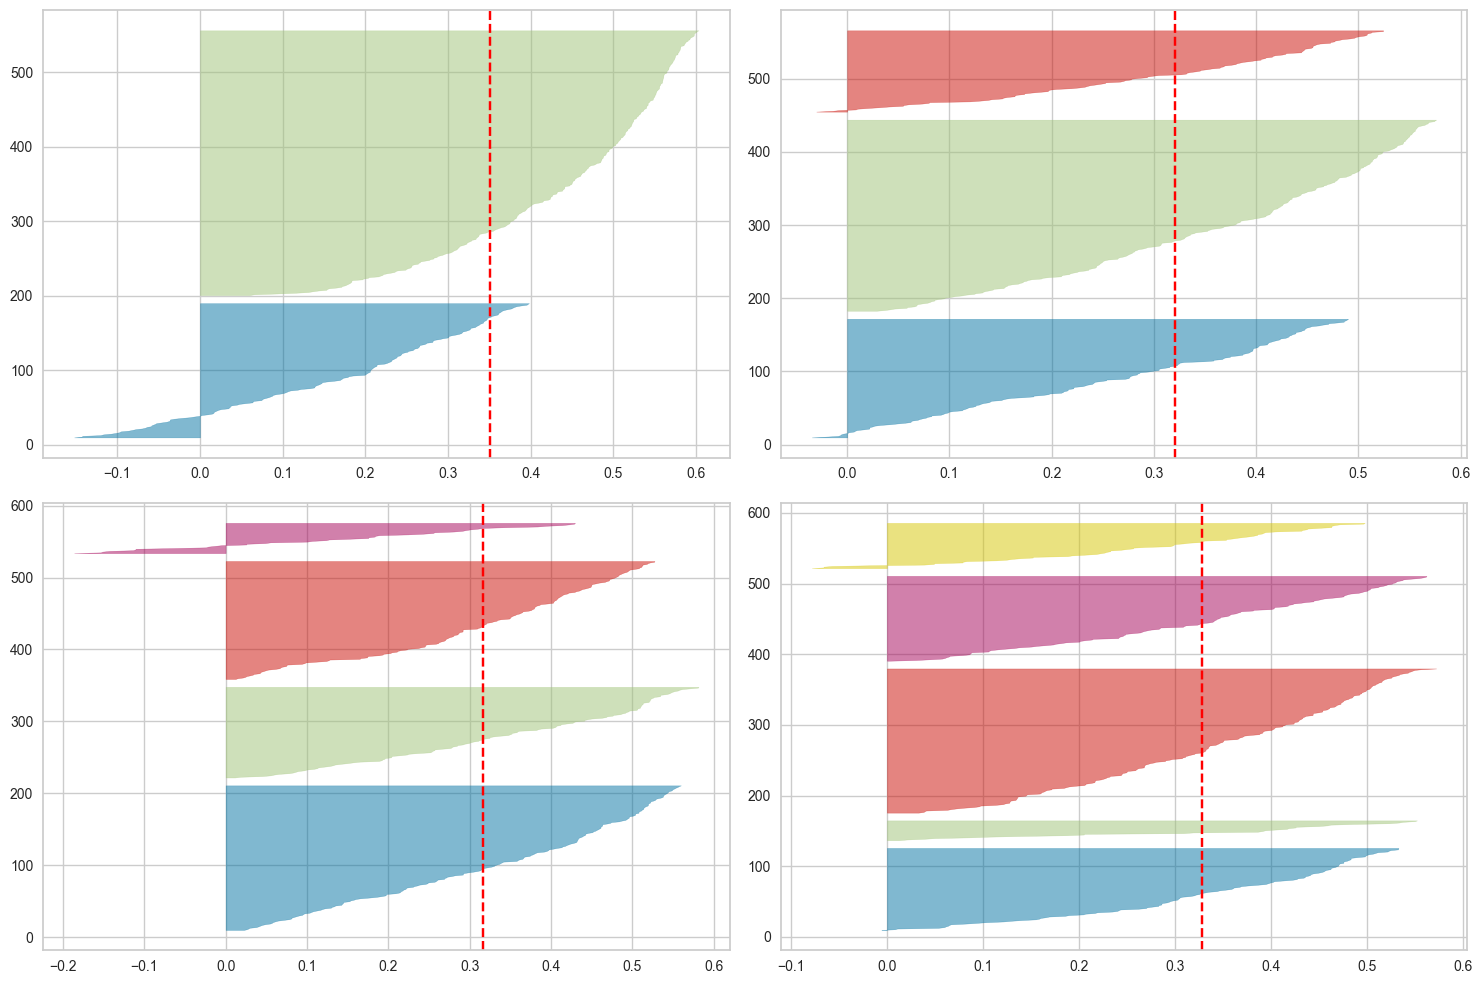

In [114]:
# Creamos la figura con 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probamos con k = 2, 3, 4, 5
for i, k in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    
    # Posición del subplot
    row = i // 2
    col = i % 2
    
    # Creamos el visualizador y ajustamos los datos
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(df_combined_stc_mm_cl)  

plt.tight_layout()
plt.show()

In [129]:
#Modelo k-means
cluster_stc_mm= KMeans(init='k-means++',n_clusters=3,random_state=42)
cluster_stc_mm.fit(df_combined_stc_mm_cl)   

KMeans(n_clusters=3, random_state=42)

In [130]:
#Se añaden las etiquetas y vemos en una tabla de contigencia cuantos smaller o higher hay en cada cluster
df_combined_stc_mm['Cluster'] = cluster_stc_mm.labels_
pd.crosstab(df_combined_stc_mm['Cluster'], df_combined_stc_mm['label'])


label,higher,smaller
Cluster,,
0,30,67
1,183,129
2,55,73


In [131]:
silhouette_avg_stc_mm = silhouette_score(df_combined_stc_mm_cl, cluster_stc_mm.labels_)
print(f'Índice de silueta promedio: {silhouette_avg_stc_mm}')

Índice de silueta promedio: 0.3571753990415442


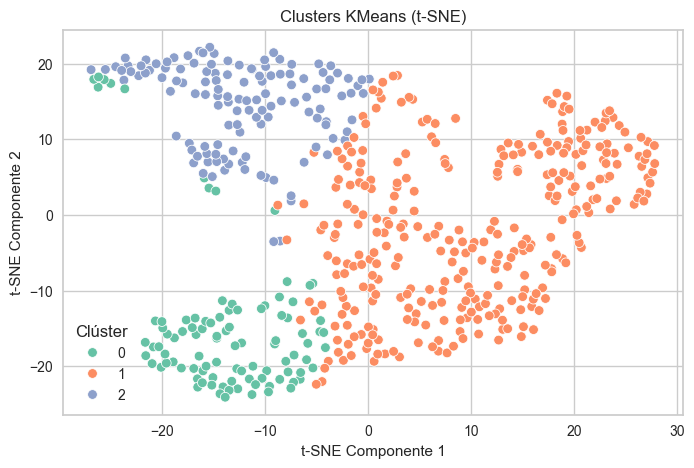

In [132]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_combined_stc_mm_cl)

# Visualización
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df_combined_stc_mm['Cluster'], palette='Set2')
plt.title('Clusters KMeans (t-SNE)')
plt.xlabel('t-SNE Componente 1')
plt.ylabel('t-SNE Componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


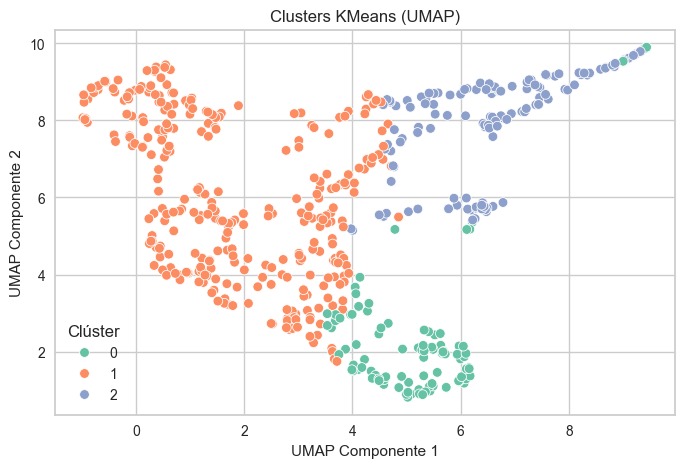

In [134]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(df_combined_stc_mm_cl)

# Visualización 
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=df_combined_stc_mm['Cluster'], palette='Set2')
plt.title('Clusters KMeans (UMAP)')
plt.xlabel('UMAP Componente 1')
plt.ylabel('UMAP Componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()


In [135]:
# Guardar resultados en DataFrame
df_resultado_mm_umap = pd.DataFrame({
    'filename': df_combined_stc_mm['filename'],
    'label': df_combined_stc_mm['label'],
    'cluster': df_combined_stc_mm['Cluster']
})

# Guardar en archivo CSV 
#df_resultado_mm_umap.to_csv(os.path.join(folder_path, 'resultado_clustering_umap.csv'), index=False)
df_resultado_mm_umap


,filename,label,cluster
0,callo_1.png,smaller,2
1,callo_10.png,smaller,2
2,callo_100.png,smaller,1
3,callo_101.png,smaller,1
4,callo_102.png,smaller,1
...,...,...,...
532,callo_95.png,higher,2
533,callo_96.png,higher,1
534,callo_97.png,higher,2
535,callo_98.png,higher,2


Con normalización z-score: Cuando se establecen 2 clusteres se concentran casi todoas las imágenes en uno solo. Si hay tres clusteres hay un 77.9% de las imágenes higher en el cluster 1. El 50.92% en el cluster 2, y una mezcla en el cluster 0.

Con la normalización min-máx no hay una separación clara, hay mezcla.